# Regression between sea level height and the nearest wind stress data point for cmip6 data

This regression can either be performed using observational or model (cmip6) data.
When observational or cmip6 data is used, functions containing respectively 'obs' or 'cmip6' should be used.


For each sea level datapoint, a wind stress data point located nearest to the sea level point to perform a regression.

In this notebook, functions are used from: 

'/code/import_data.py' 

'/code/regression.py' 

'/code/figures.py' 

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/Wind_contribution/Analysis/code')

import import_data as imprt
import regression as regres
import figures as figs

data_type = 'historical' # For data_type choose ['historical', 'piControl', 'ssp119', 'ssp126', 'ssp245' 'ssp370', 'ssp585']
model = 'NearestPoint'

begin = 1950
end = 2014
period = f'{begin}-{end}'

#### Import and plot cmip6 sea level data (zos) and wind data historical

In [2]:
# Open data file
zos = imprt.import_cmip6_slh_data()

In [3]:
wind_data = imprt.import_cmip6_wind_data(model = model, data_type = data_type)

In [4]:
# Select period from 1950 - 2014
zos = zos.where(zos.time >= 1950, drop=True)
wind_data = wind_data.where(zos.time >= 1950, drop=True)


### Plot data

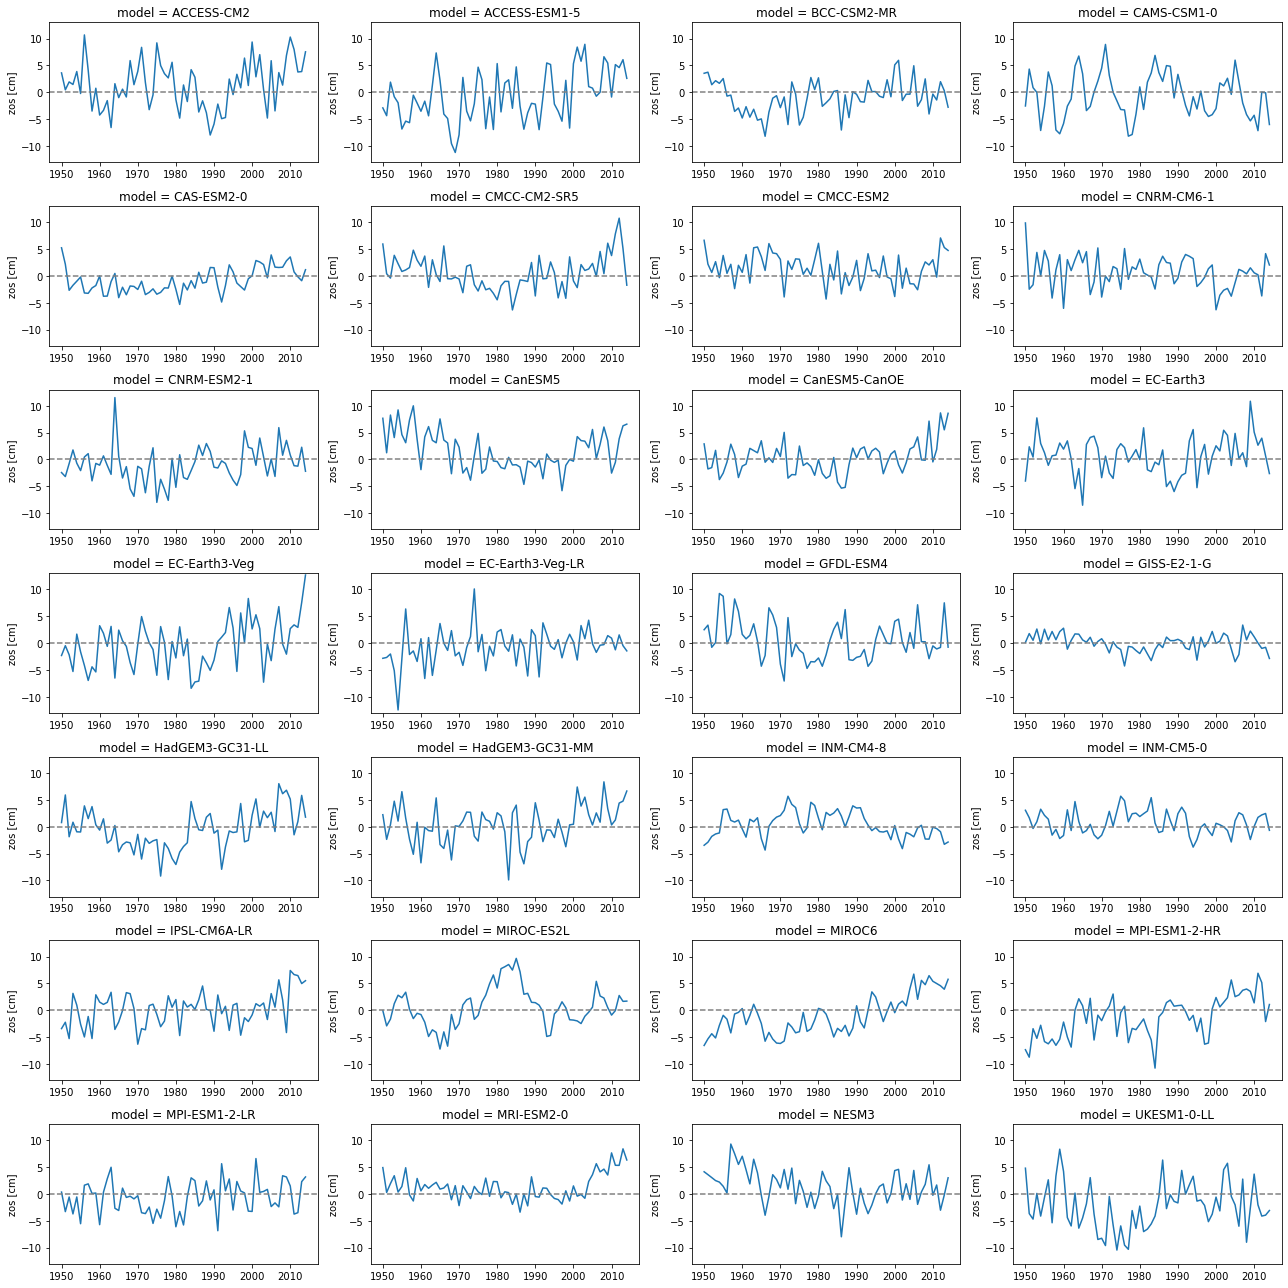

In [5]:
figs.plot_zos_data_per_model(zos, data_type, period = period)

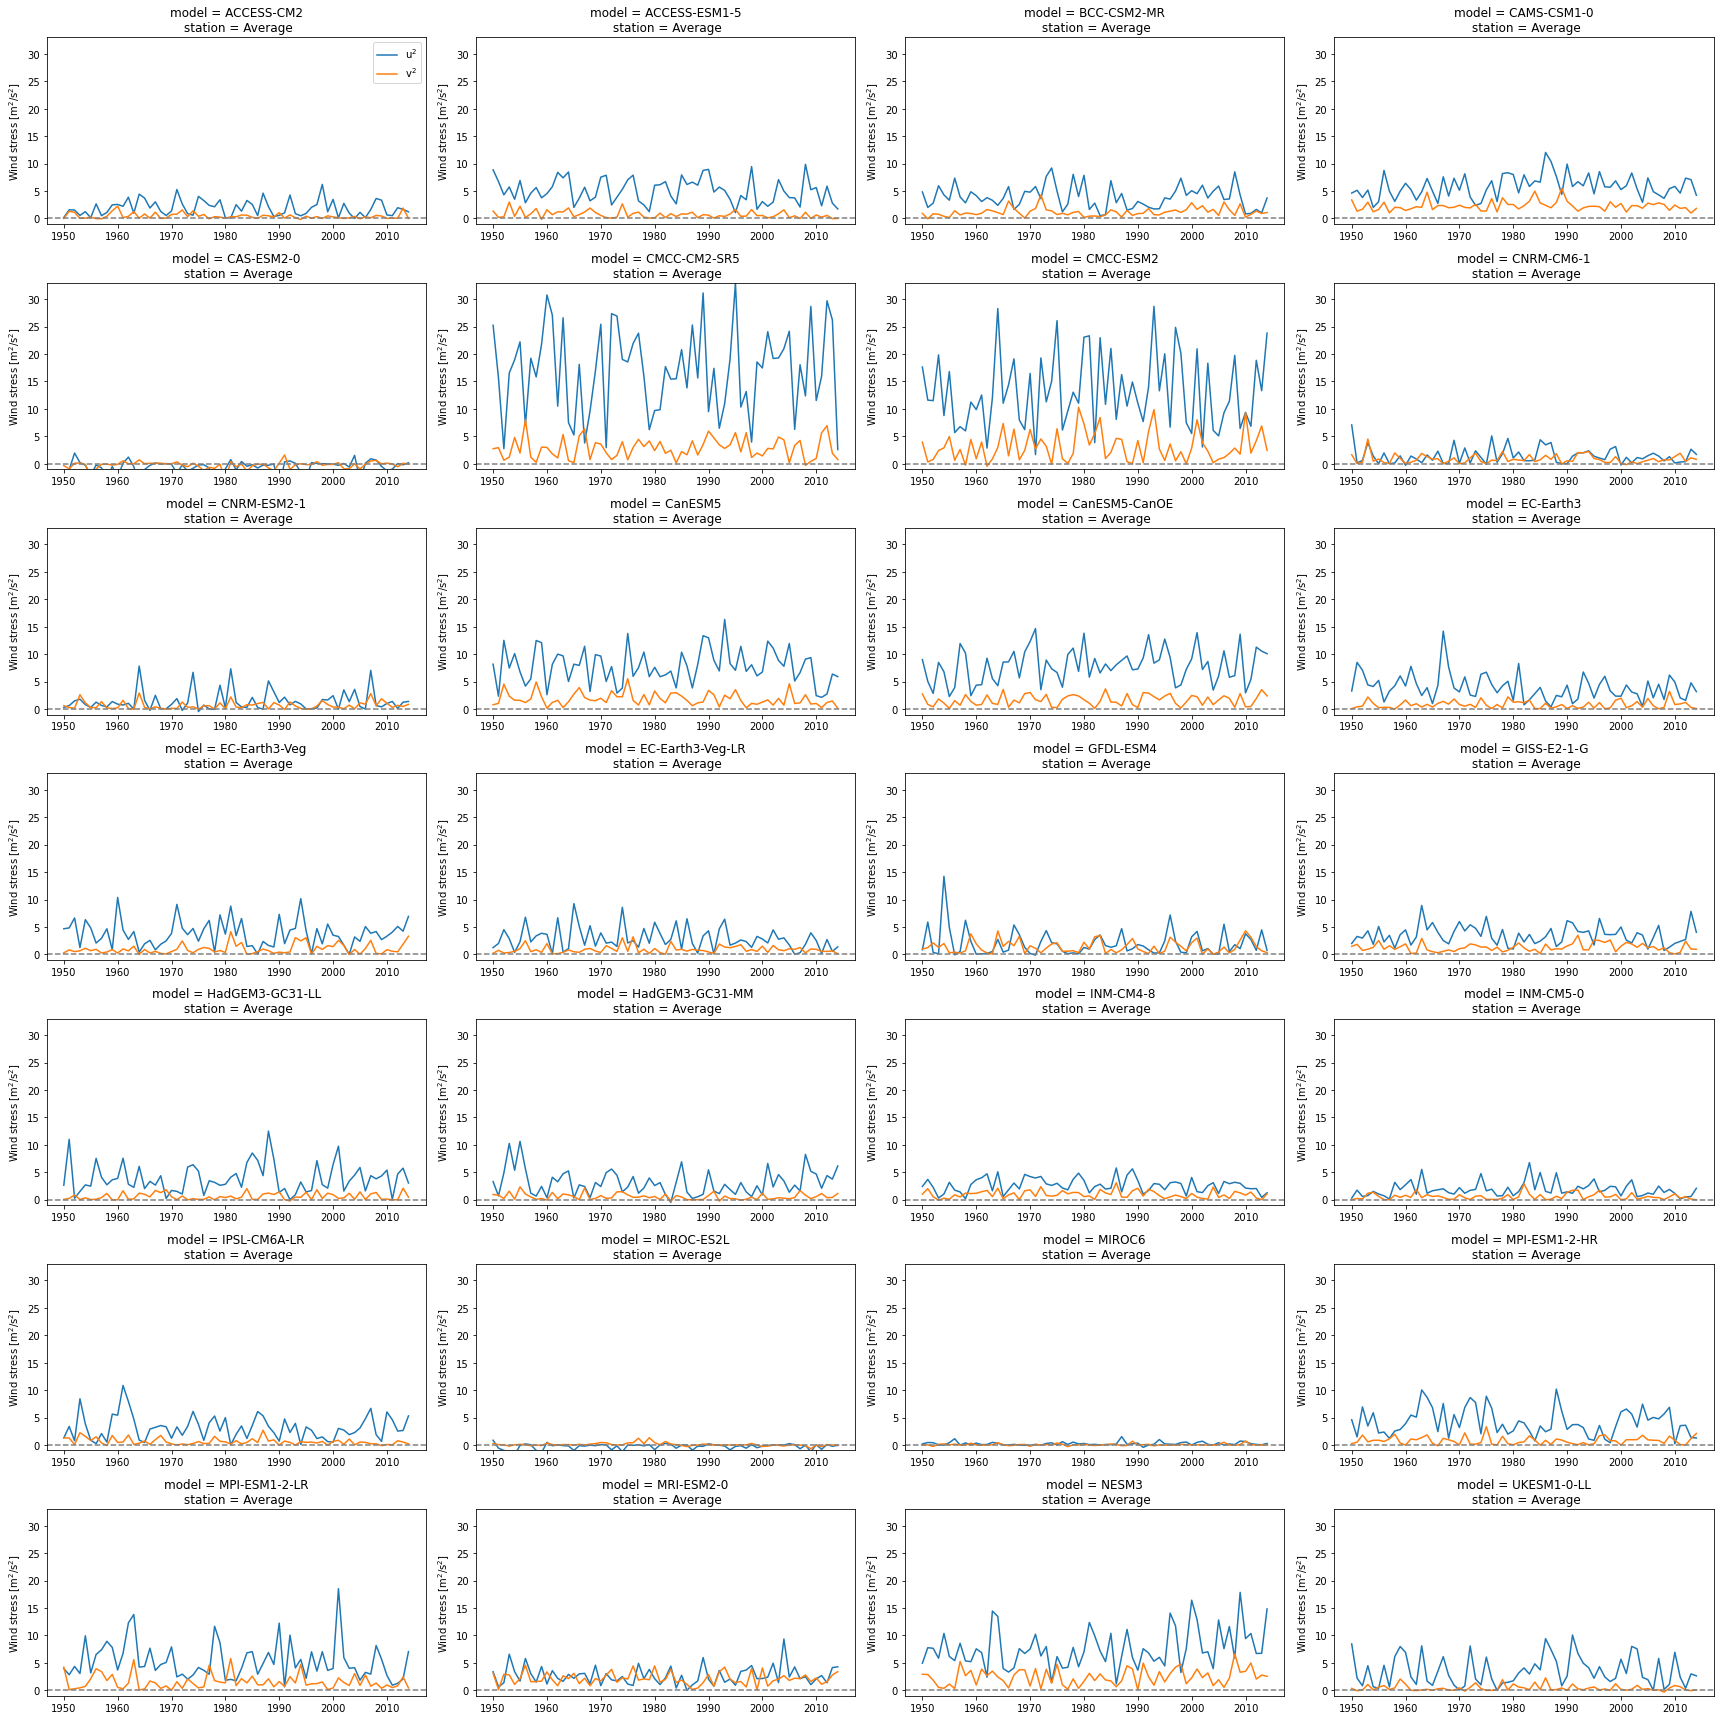

In [6]:
figs.plot_cmip6_wind_data_per_model(wind_data, model, data_type, period = period)

#### Plot data locations

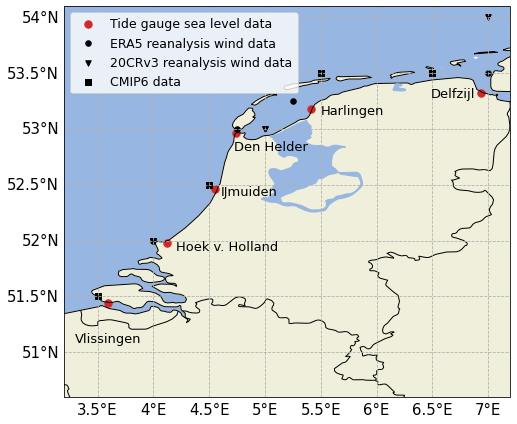

In [7]:
figs.plot_np_locations(title = False, period = period)

### Perform regression

In [8]:
results, timeseries, significance = regres.regression_cmip6(wind_data, zos, wind_model = model, data_type = data_type)

In [9]:
results.sel(station='Average', drop=True).to_pandas().T

model,ACCESS-CM2,ACCESS-ESM1-5,BCC-CSM2-MR,CAMS-CSM1-0,CAS-ESM2-0,CMCC-CM2-SR5,CMCC-ESM2,CNRM-CM6-1,CNRM-ESM2-1,CanESM5,...,INM-CM4-8,INM-CM5-0,IPSL-CM6A-LR,MIROC-ES2L,MIROC6,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,UKESM1-0-LL
r2,0.293478,0.197634,0.437793,0.100836,0.472398,0.636631,0.477768,0.579966,0.846574,0.751850,...,0.320469,0.143012,0.604434,0.249658,0.264718,0.761606,0.757264,0.660200,0.714999,0.865362
r2_wind,0.293380,0.184902,0.396550,0.078346,0.224217,0.222713,0.467981,0.574196,0.719748,0.364447,...,0.190334,0.130170,0.536258,0.249566,0.250364,0.631409,0.751440,0.608249,0.560931,0.705052
r2_u2,0.109352,0.133643,0.093011,0.078153,0.227183,0.224089,0.437596,0.491333,0.640643,0.375017,...,0.169731,0.078595,0.507908,0.000422,0.163340,0.587806,0.686877,0.511132,0.303984,0.612196
r2_v2,0.131994,0.009662,0.274673,0.021602,0.003821,0.001011,0.213406,0.267408,0.431877,0.110294,...,0.024143,0.028646,0.189519,0.216676,0.102600,0.012788,0.238766,0.168418,0.427050,0.282589
rmse,3.284511,3.879199,2.392925,4.207887,1.381546,1.599024,1.756985,2.194278,1.424362,1.865452,...,2.014859,1.977364,1.806609,2.840597,1.870939,1.519365,1.347163,0.935319,1.640447,1.737976
constant,1.898991,-1.429379,-3.137562,-1.706517,-3.889724,-2.712095,1.964940,0.646147,-3.940521,-1.630479,...,2.504847,1.497278,0.349038,-1.248041,-2.391047,-1.302605,-1.953180,0.437892,0.662975,-6.450797
u2,1.653811,2.119396,1.350539,1.457243,-1.028736,1.150035,1.460188,1.690235,2.604476,2.017707,...,0.917694,0.718893,1.460757,-0.545745,1.036768,2.346027,2.161151,1.151410,1.272475,2.694622
v2,-1.449750,-0.788993,-1.511975,0.084818,-0.138574,0.156760,0.569188,0.856503,0.801927,0.370594,...,-0.456071,-0.560010,0.839928,1.596791,0.737882,-0.493836,0.652987,0.599014,1.625437,1.729368
trend,0.083780,1.030267,-1.359926,-1.457679,-2.032722,-3.581077,-0.514794,-0.539580,-2.716872,-4.889545,...,1.968168,0.521087,1.581665,-0.080309,0.551022,2.381310,-0.440773,-0.767875,-2.552866,-4.018906


In [10]:
significance.sel(station='Average').to_dataframe().drop('station', axis=1)

,u$^2$,v$^2$,trend,total,wind total
model,,,,,
ACCESS-CM2,False,True,False,True,True
ACCESS-ESM1-5,True,False,False,True,True
BCC-CSM2-MR,False,True,False,True,True
CAMS-CSM1-0,False,False,False,False,False
CAS-ESM2-0,True,False,True,True,True
CMCC-CM2-SR5,True,False,True,True,True
CMCC-ESM2,True,True,False,True,True
CNRM-CM6-1,True,True,False,True,True
CNRM-ESM2-1,True,True,False,True,True


#### Plot regression results

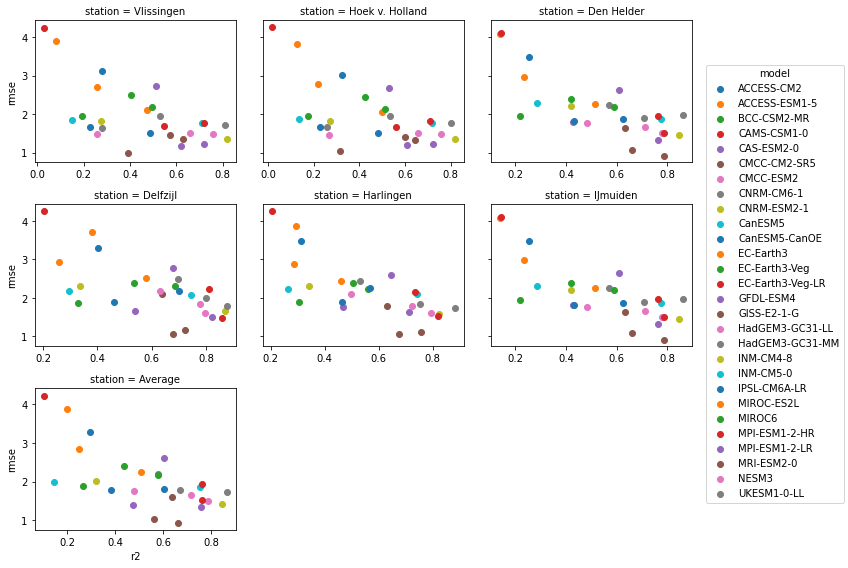

In [11]:
figs.plot_cmip6_two_variables(results, 'r2', 'rmse', data_type, period = period)

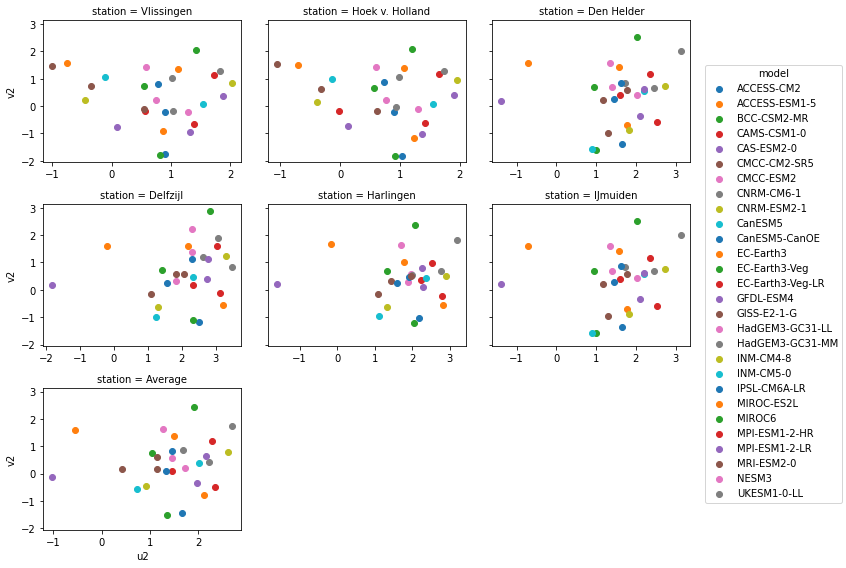

In [12]:
figs.plot_cmip6_two_variables(results, 'u2', 'v2', data_type, period = period)

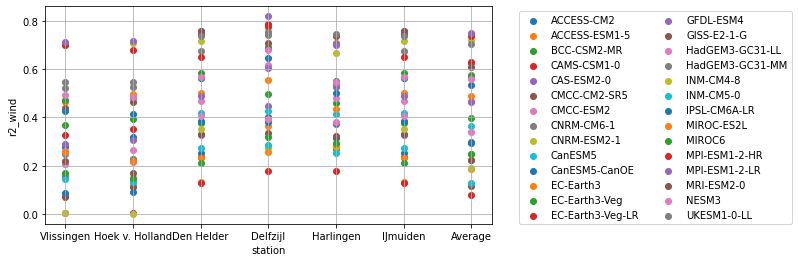

In [13]:
figs.plot_cmip6_result_per_station(results, 'r2_wind', data_type, period = period)

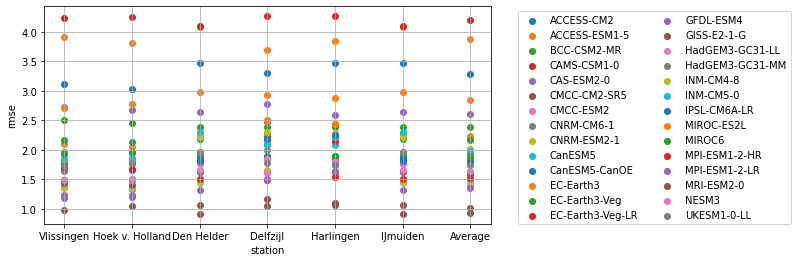

In [14]:
figs.plot_cmip6_result_per_station(results, 'rmse', data_type, period = period)

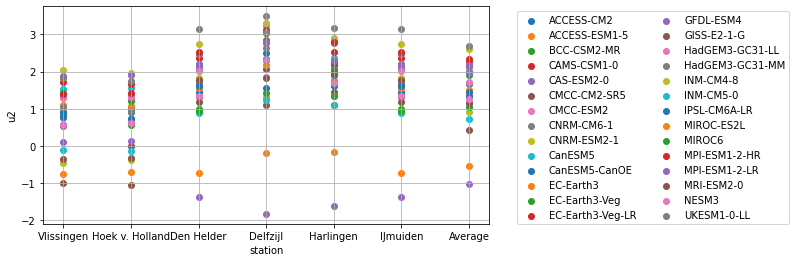

In [15]:
figs.plot_cmip6_result_per_station(results, 'u2', data_type, period = period)

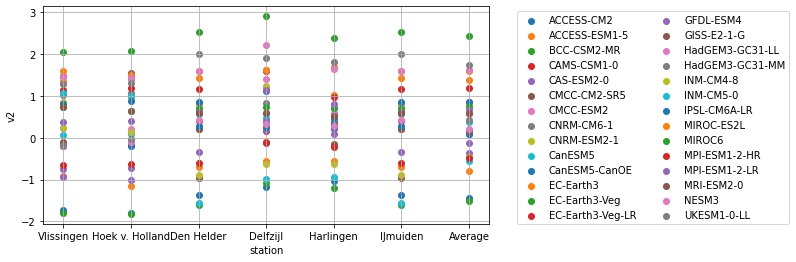

In [16]:
figs.plot_cmip6_result_per_station(results, 'v2', data_type, period = period)

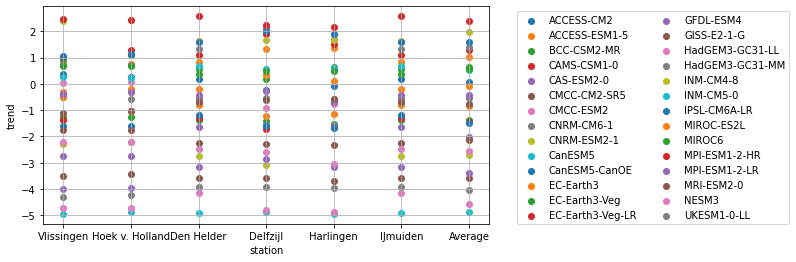

In [17]:
figs.plot_cmip6_result_per_station(results, 'trend', data_type, period = period)

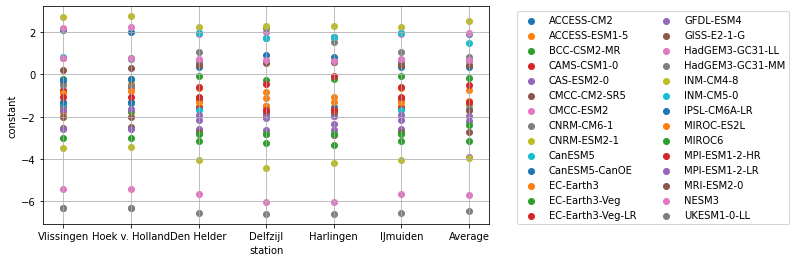

In [18]:
figs.plot_cmip6_result_per_station(results, 'constant', data_type, period = period)

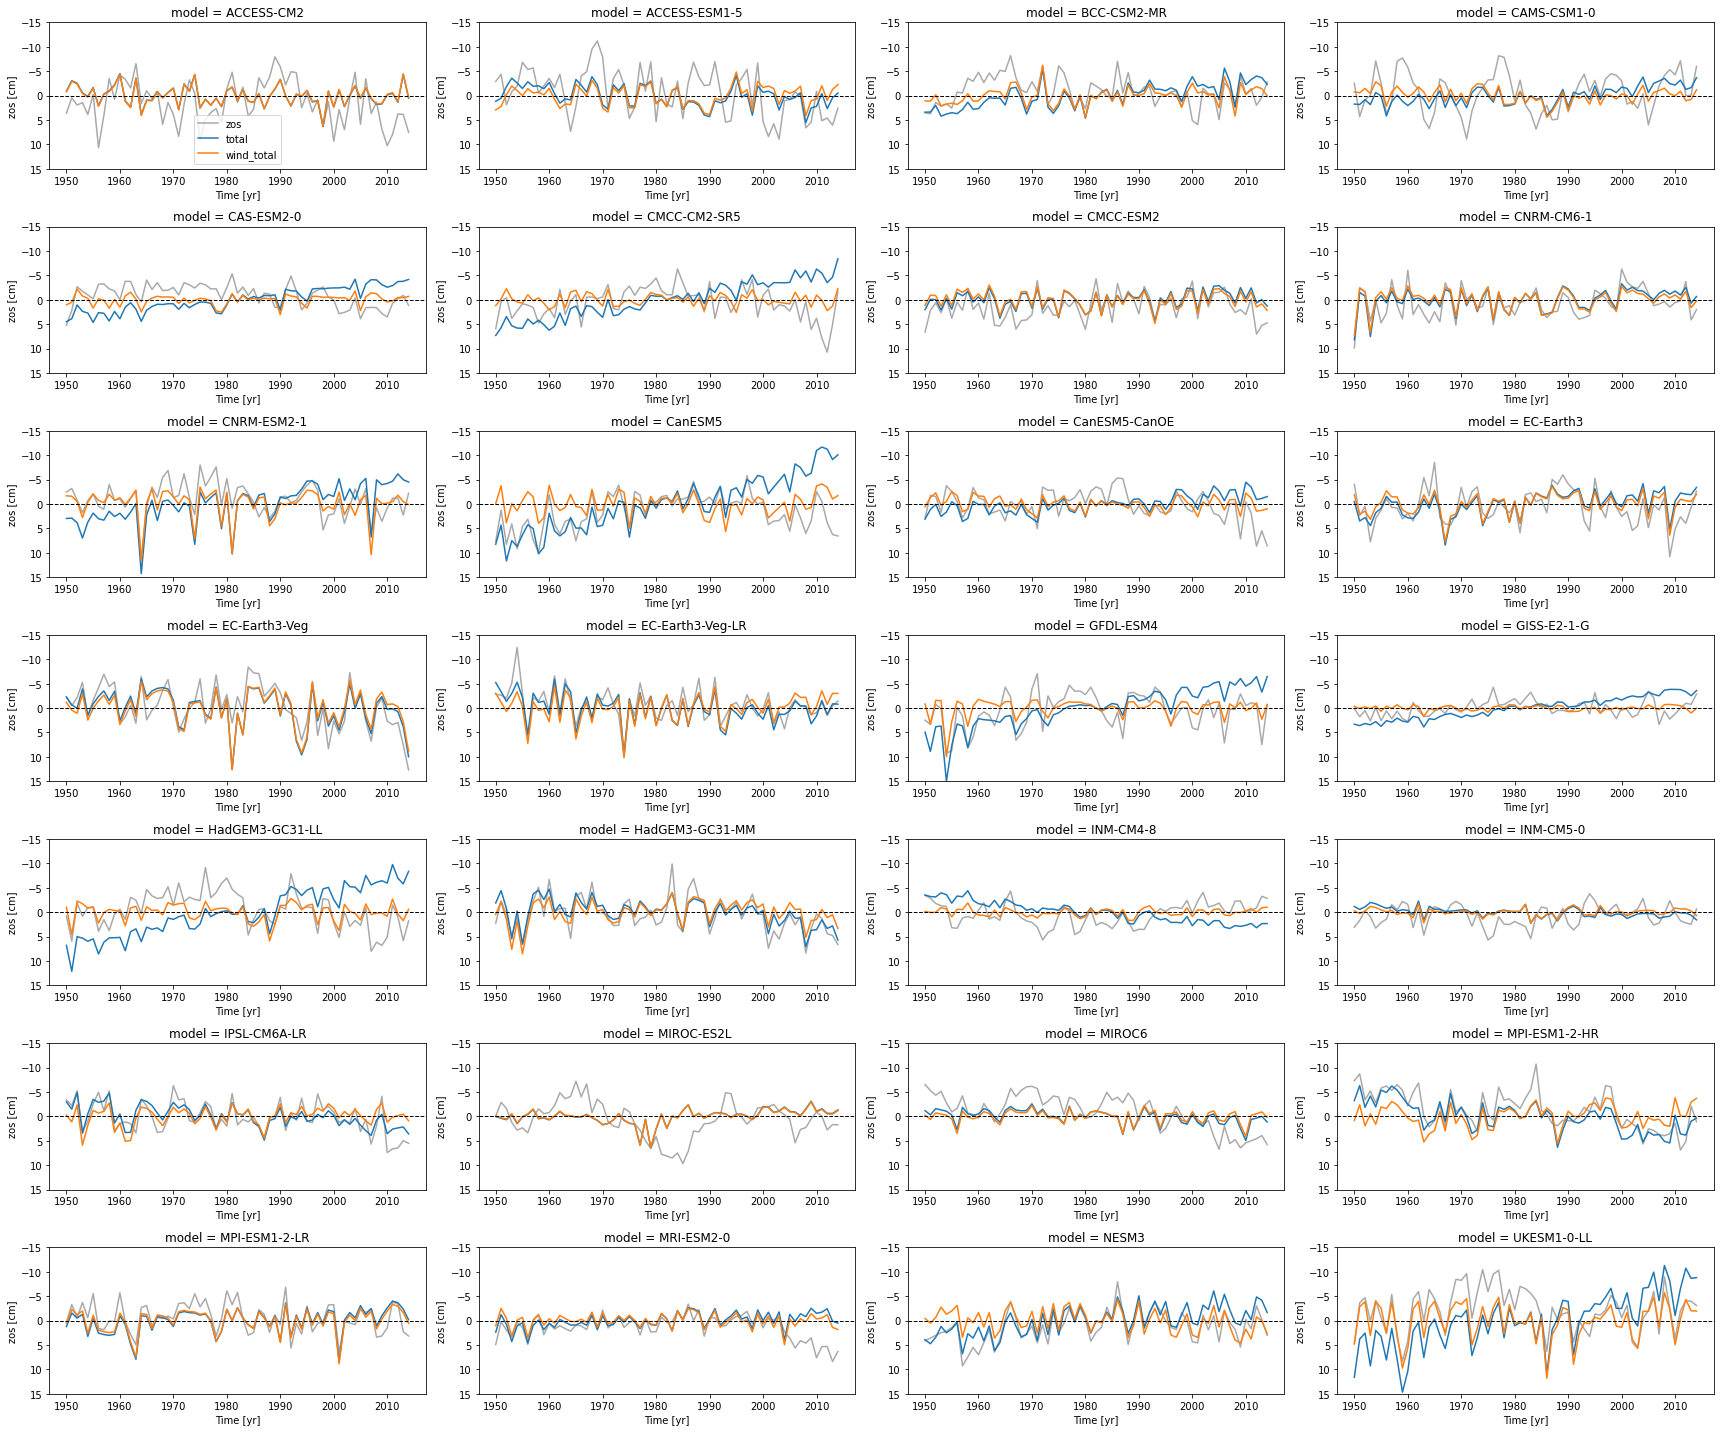

In [19]:
labels = ['total', 'wind_total']

figs.plot_zos_regression_result_per_model_one_station(zos, timeseries, labels, model, period = period)

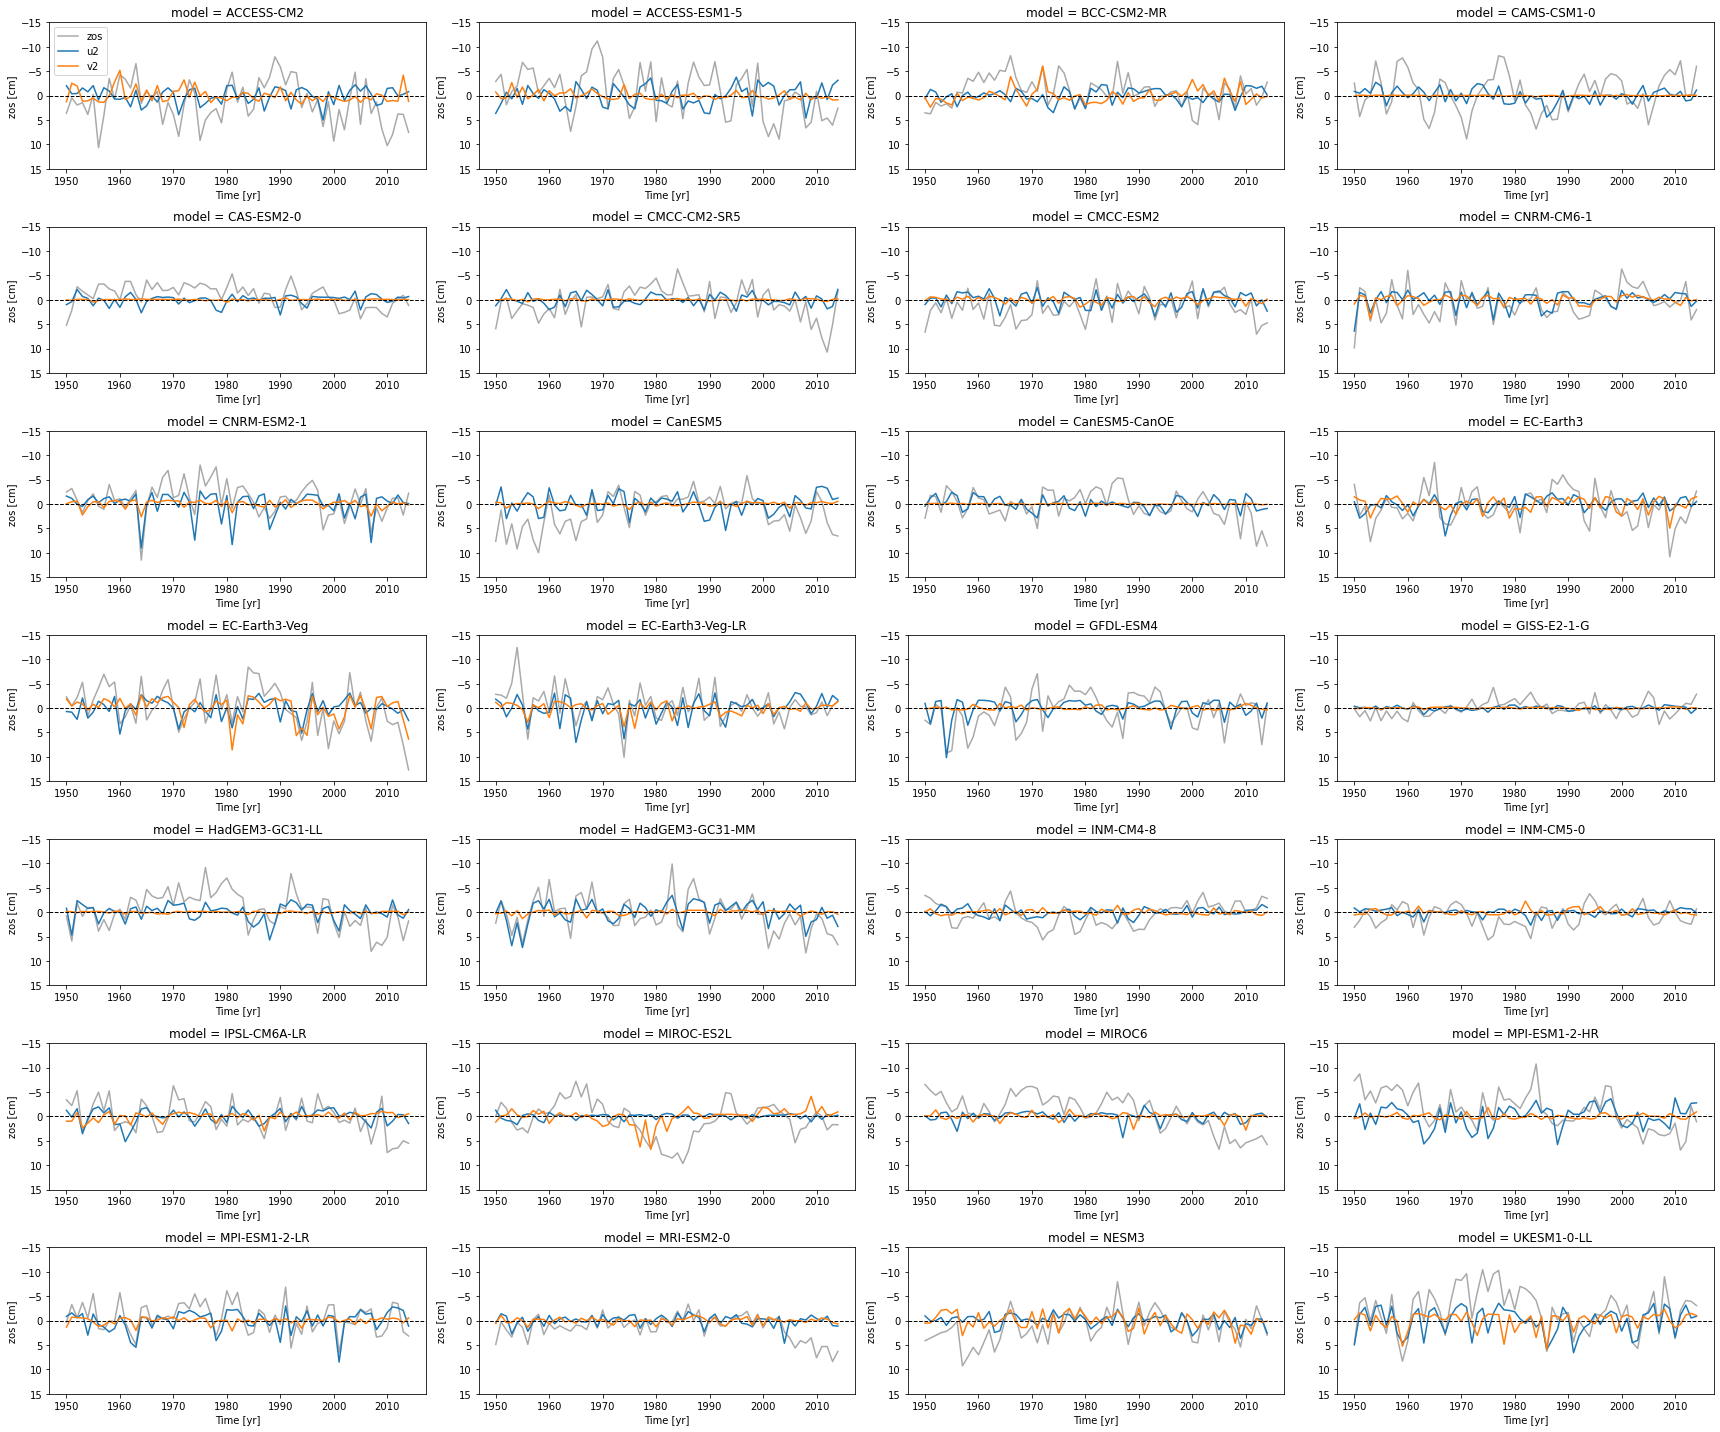

In [20]:
labels = ['u2', 'v2']

figs.plot_zos_regression_result_per_model_one_station(zos, timeseries, labels, model, period = period)

#### Plot trends

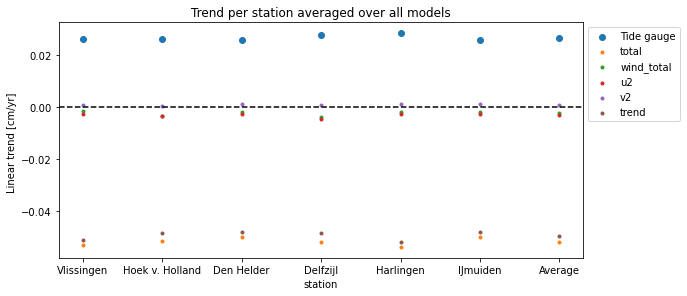

In [21]:
figs.plot_cmip6_trends_timeseries_per_station_model_averages(zos, timeseries, ['total', 'wind_total', 'u2', 'v2', 'trend'], 
                                                             model, data_type, errorbar = False, period = period)

### Obtain trends

In [22]:
best_models = ['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CAMS-CSM1-0', 'CanESM5', 
               'CanESM5-CanOE', 'CMCC-CM2-SR5', 'CMCC-ESM2', 'CNRM-CM6-1', 
               'EC-Earth3-Veg-LR', 'GFDL-ESM4', 'MIROC-ES2L', 
                'MPI-ESM1-2-HR', 'NESM3']

In [24]:
import pandas as pd

df = pd.DataFrame({'variable': ['trend', 'se']})
df = df.set_index('variable')

for model in timeseries.where(timeseries.model.isin(best_models), drop = True).model.values:
    trend = linregress(timeseries.time, timeseries.wind_total.sel(station = 'Average', model = model).values).slope*10
    se = linregress(timeseries.time, timeseries.wind_total.sel(station = 'Average', model = model).values).stderr*10
    df[model] = [trend, se]

    
dfT = df.T

df['Average'] = [dfT.mean()['trend'], dfT.mean()['se']]

df.T

NameError: name 'linregress' is not defined

In [27]:
from scipy.stats import linregress
import pandas as pd
import numpy as np

df_trends = pd.DataFrame({'model': timeseries.model.values, 'trend':'', 'se':''})
df_trends = df_trends.set_index('model')

for model in timeseries.model.values:
    df_trends['trend'][model] = linregress(timeseries.time.values, timeseries.wind_total.sel(station = 'Average', model = model)).slope*10
    df_trends['se'][model] = linregress(timeseries.time.values, timeseries.wind_total.sel(station = 'Average', model = model)).stderr*10

df_trends

,trend,se
model,,
ACCESS-CM2,0.143416,0.133857
ACCESS-ESM1-5,-0.077042,0.133707
BCC-CSM2-MR,-0.223619,0.119587
CAMS-CSM1-0,0.163054,0.097198
CAS-ESM2-0,-0.086765,0.07024
CMCC-CM2-SR5,0.025222,0.079157
CMCC-ESM2,0.072289,0.117033
CNRM-CM6-1,-0.094275,0.142077
CNRM-ESM2-1,0.133336,0.204006


In [28]:
df_trends.max()

trend    0.352338
se        0.24874
dtype: object

In [32]:
df_trends.min()

trend   -0.257982
se       0.033175
dtype: object

In [30]:
df_trends.mean()

trend   -0.023217
se       0.127337
dtype: float64

In [29]:
df_trends.std()

trend    0.156438
se       0.052649
dtype: float64